In [110]:
#PROBLEMA 1
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [34]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [35]:
# dimensions
countries.shape

(252, 2)

In [36]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [37]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


In [38]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [39]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [40]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

,Officialstatename,InternetccTLD,iso2,iso3,Country,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date
0,The Islamic Republic of Afghanistan,.af,AF,AFG,AFGHANISTAN,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018
1,The Republic of Albania,.al,AL,ALB,ALBANIA,2019,58.9,3794000.0,2019,EUROPE,0.18,2018
2,The People's Democratic Republic of Algeria,.dz,DZ,DZA,ALGERIA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018
3,The Republic of Angola,.ao,AO,AGO,ANGOLA,2019,87.8,19362000.0,2019,AFRICA,0.36,2018
4,Antigua and Barbuda,.ag,AG,ATG,ANTIGUA AND BARBUDA,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018


In [41]:
onlyfragilityCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

In [42]:
onlyfragilityCia

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 'CZECHIA',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)',
 'VIET NAM'}

In [43]:
# and here
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAHAMAS',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ERITREA',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GAMBIA',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'HE

In [44]:
!pip install thefuzz

In [45]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyfragilityCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('DOMINICAN REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MAC

In [46]:
# subsetting
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyfragilityCia)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('WESTERN SAMOA', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZANIA, THE UNITED REPUBLIC OF', ('TANZANIA', 90)),
 ('UNITED ARAB EMIRATES (THE)', 

In [47]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyfragilityCia)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'WESTERN SAMOA',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'UNITED KINGDOM',
 'UNITED STATES OF AMERICA (THE)': 'UNITED STATES',
 'VIET

In [48]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [49]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|ESW|SWA')]

,COUNTRY,geometry
17,BOTSWANA,"POLYGON ((26.40114 -24.63189, 26.38996 -24.627..."
126,LAOS,"POLYGON ((104.25700 17.88763, 104.23943 17.937..."
243,SWAZILAND,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."


In [50]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)"}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [51]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

{'CABO VERDE': 'CAPE VERDE',
 'CZECHIA': 'CZECH REPUBLIC',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'KOREA (THE REPUBLIC OF)': 'NORTH KOREA',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [52]:
# changing
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

In [53]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            171 non-null    object  
 1   geometry           171 non-null    geometry
 2   Officialstatename  171 non-null    object  
 3   InternetccTLD      171 non-null    object  
 4   iso2               170 non-null    object  
 5   iso3               171 non-null    object  
 6   fragility_date     171 non-null    int64   
 7   fragility          171 non-null    float64 
 8   co2                171 non-null    float64 
 9   co2_date           171 non-null    int64   
 10  region             171 non-null    object  
 11  ForestRev_gdp      171 non-null    float64 
 12  ForestRev_date     171 non-null    int64   
dtypes: float64(3), geometry(1), int64(3), object(6)
memory usage: 17.5+ KB


In [54]:
#CHOROPLETHS
DataNames=['co2', 'ForestRev_gdp']

In [55]:
pd.melt(theMapAndData[DataNames])

,variable,value
0,co2,7.290000e+05
1,co2,7.893000e+06
2,co2,1.516330e+08
3,co2,3.538900e+07
4,co2,3.794000e+06
...,...,...
337,ForestRev_gdp,4.450000e+00
338,ForestRev_gdp,1.610000e+00
339,ForestRev_gdp,2.650000e+00
340,ForestRev_gdp,3.900000e-01


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


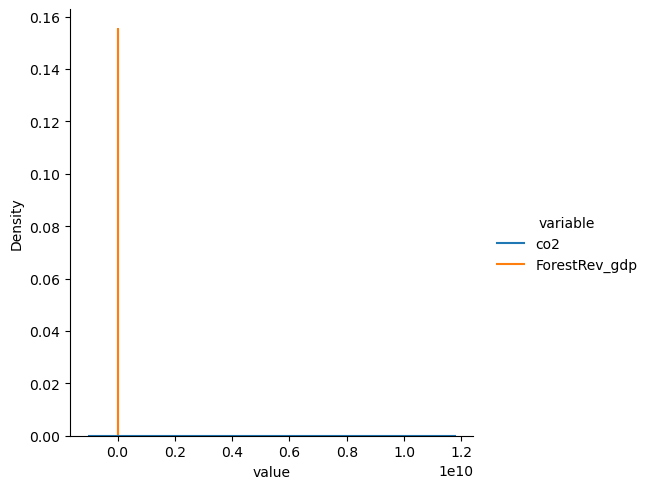

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


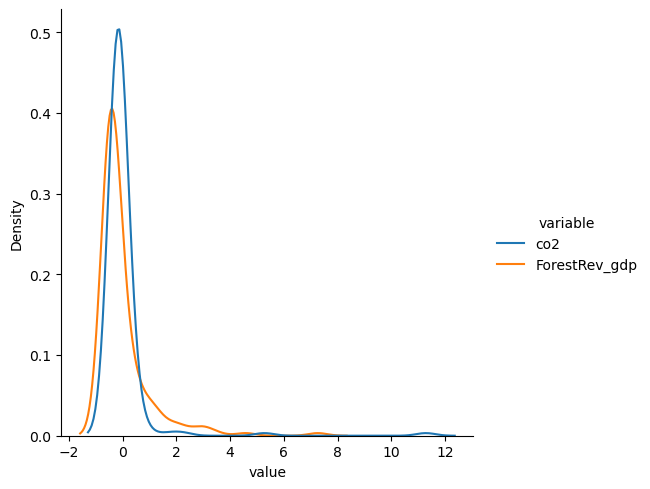

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


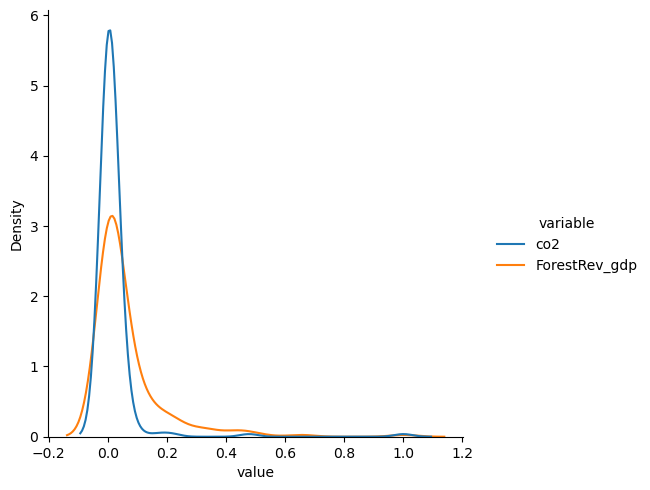

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


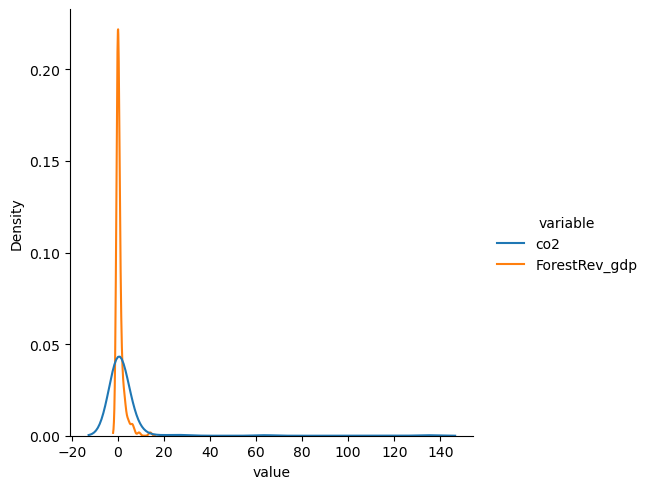

In [59]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


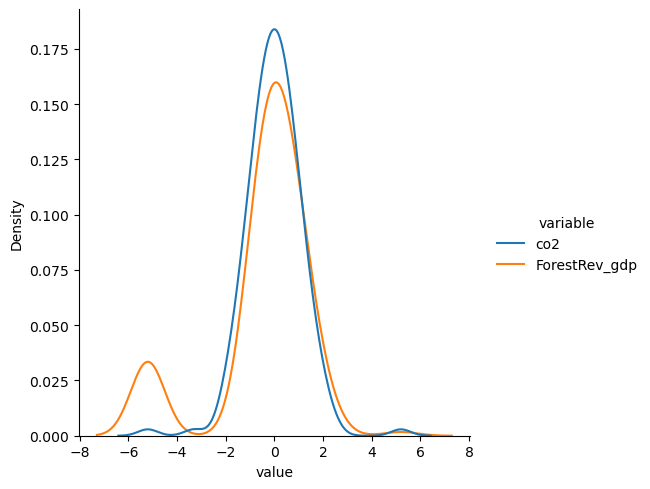

In [60]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [61]:
theMapAndData['co2_Qt']=QtScaled_data[:,0]

In [62]:
!pip install numba

In [64]:
!pip install pysal

In [65]:
!pip install mapclassify

In [66]:
!pip install numpy

In [67]:
! pip show numba mapclassify numpy

Name: numba
Version: 0.59.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: D:\Anaconda\Lib\site-packages
Requires: llvmlite, numpy
Required-by: datashader, quantecon, segregation
---
Name: mapclassify
Version: 2.5.0
Summary: Classification Schemes for Choropleth Maps.
Home-page: https://github.com/pysal/mapclassify
Author: 
Author-email: 
License: 3-Clause BSD
Location: D:\Anaconda\Lib\site-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: pysal, segregation, splot, spopt
---
Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source

In [68]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.co2_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [69]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

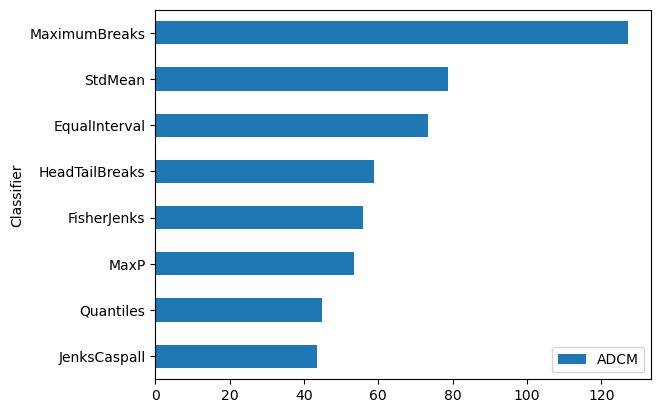

In [70]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [71]:
theMapAndData['co2_Qt_jc5'] = jc5.yb

In [72]:
# there you are
theMapAndData[['co2_Qt','co2_Qt_jc5']].head()

,co2_Qt,co2_Qt_jc5
0,-1.417436,0
1,-0.312096,1
2,0.903225,3
3,0.282063,2
4,-0.757475,1


In [73]:
indexList=['co2_Qt_jc5']
aggregator={'co2_Qt': ['mean']}

pd.concat([theMapAndData[['co2_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,co2_Qt_jc5,co2_Qt
,,mean
0,0,-1.663108
1,1,-0.623926
2,2,0.014829
3,3,0.640064
4,4,1.630121


In [74]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['co2_Qt_jc5_cat']=theMapAndData.loc[:,'co2_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['co2_Qt','co2_Qt_jc5','co2_Qt_jc5_cat']].head(20)

,co2_Qt,co2_Qt_jc5,co2_Qt_jc5_cat
0,-1.417436,0,0_Great
1,-0.312096,1,1_Good
2,0.903225,3,3_Bad
3,0.282063,2,2_Middle
4,-0.757475,1,1_Good
5,-0.514615,1,1_Good
6,0.106163,2,2_Middle
7,0.956291,3,3_Bad
8,1.417745,4,4_Poor
9,0.593317,3,3_Bad


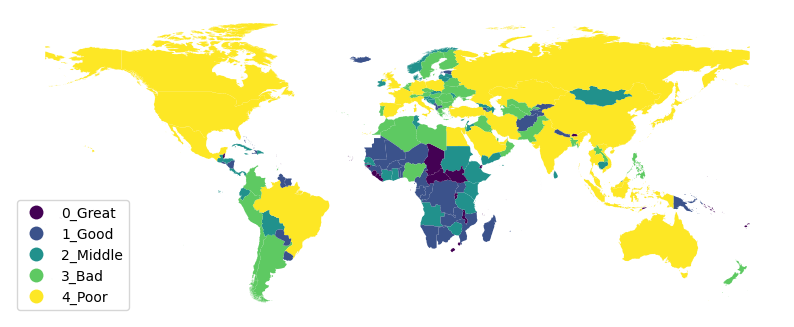

In [75]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='co2_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

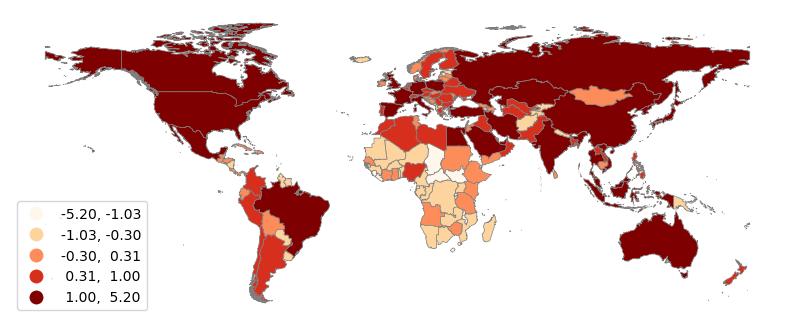

In [76]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='co2_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [77]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

In [78]:
#FORESTREV

DataNames2=['ForestRev_gdp']

In [79]:
pd.melt(theMapAndData[DataNames2])

,variable,value
0,ForestRev_gdp,0.00
1,ForestRev_gdp,0.20
2,ForestRev_gdp,0.10
3,ForestRev_gdp,0.02
4,ForestRev_gdp,0.18
...,...,...
166,ForestRev_gdp,4.45
167,ForestRev_gdp,1.61
168,ForestRev_gdp,2.65
169,ForestRev_gdp,0.39


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


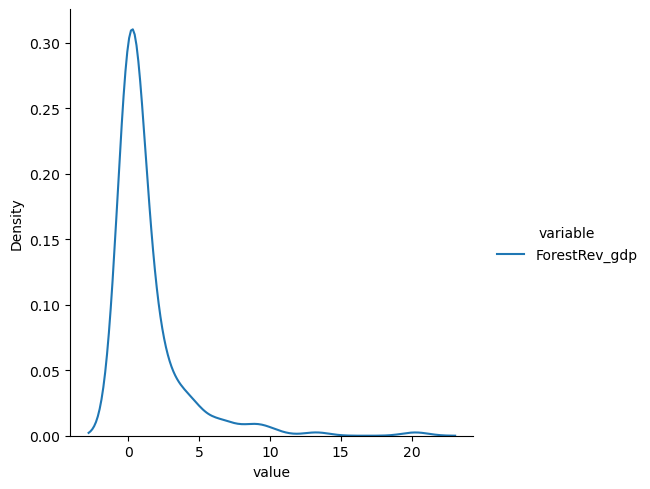

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames2]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


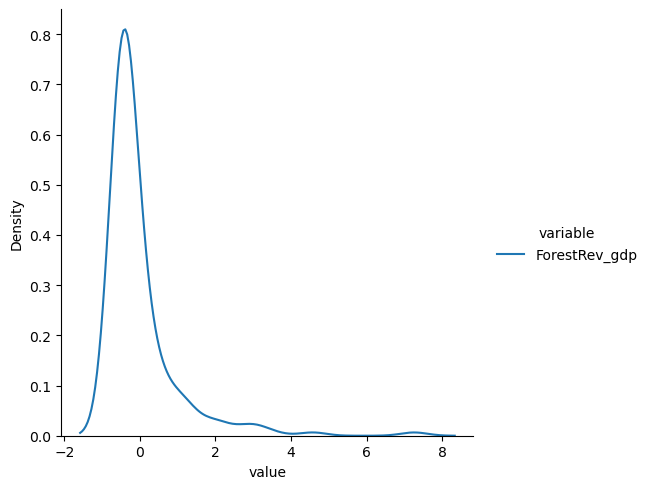

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames2])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames2)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


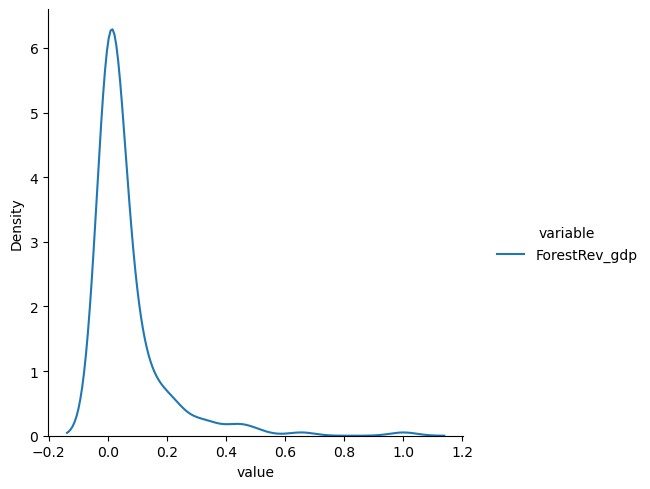

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames2])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames2)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


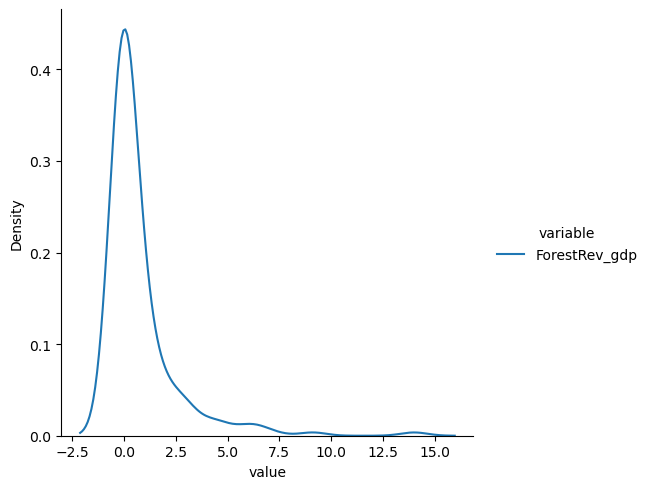

In [83]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames2])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames2)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


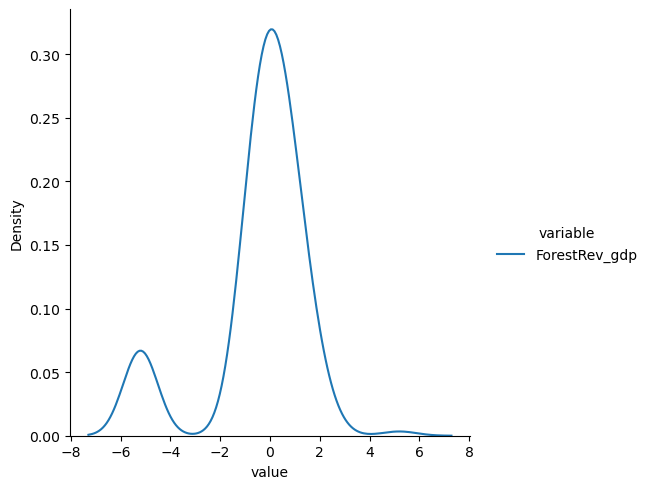

In [84]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames2])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames2)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [85]:
theMapAndData['ForestRev_gdp_Qt']=QtScaled_data[:,0]

In [86]:
! pip show numba mapclassify numpy

Name: numba
Version: 0.59.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: D:\Anaconda\Lib\site-packages
Requires: llvmlite, numpy
Required-by: datashader, quantecon, segregation
---
Name: mapclassify
Version: 2.5.0
Summary: Classification Schemes for Choropleth Maps.
Home-page: https://github.com/pysal/mapclassify
Author: 
Author-email: 
License: 3-Clause BSD
Location: D:\Anaconda\Lib\site-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: pysal, segregation, splot, spopt
---
Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source

In [87]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.ForestRev_gdp
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [88]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

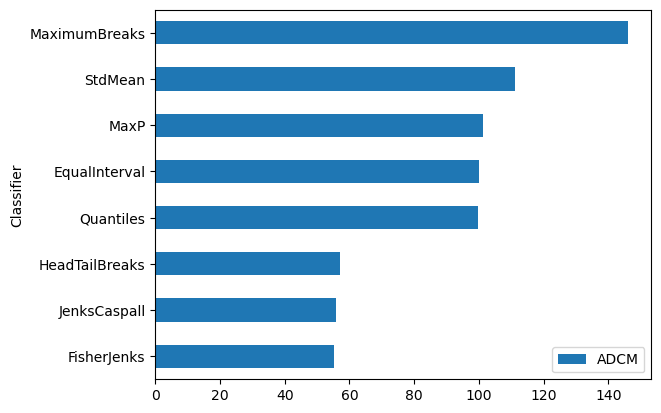

In [89]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [90]:
theMapAndData['ForestRev_gdp_Qt_jc5'] = jc5.yb

In [91]:
# there you are
theMapAndData[['ForestRev_gdp_Qt','ForestRev_gdp_Qt_jc5']].head()

,ForestRev_gdp_Qt,ForestRev_gdp_Qt_jc5
0,-5.199338,0
1,-0.076809,1
2,-0.352465,0
3,-0.827130,0
4,-0.106447,0


In [92]:
indexList=['ForestRev_gdp_Qt_jc5']
aggregator={'ForestRev_gdp_Qt': ['mean']}

pd.concat([theMapAndData[['ForestRev_gdp_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,ForestRev_gdp_Qt_jc5,ForestRev_gdp_Qt
,,mean
0,0,-1.754261
1,1,0.203812
2,2,0.782725
3,3,1.353722
4,4,2.414789


In [93]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['ForestRev_gdp_Qt_jc5_cat']=theMapAndData.loc[:,'ForestRev_gdp_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['ForestRev_gdp_Qt','ForestRev_gdp_Qt_jc5','ForestRev_gdp_Qt_jc5_cat']].head(20)

,ForestRev_gdp_Qt,ForestRev_gdp_Qt_jc5,ForestRev_gdp_Qt_jc5_cat
0,-5.199338,0,0_Great
1,-0.076809,1,1_Good
2,-0.352465,0,0_Great
3,-0.827130,0,0_Great
4,-0.106447,0,0_Great
5,0.088585,1,1_Good
6,0.206072,1,1_Good
7,-0.421391,0,0_Great
8,-0.271880,0,0_Great
9,-0.536176,0,0_Great


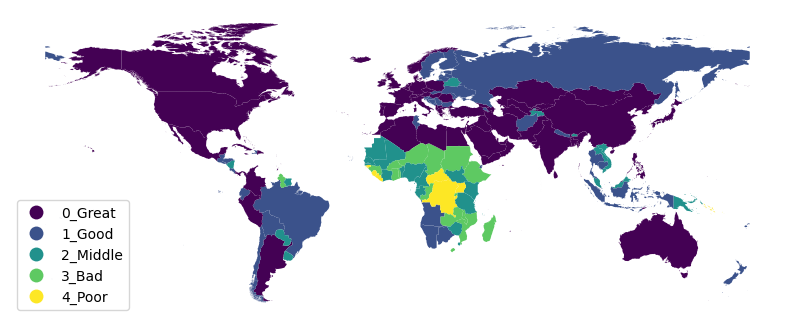

In [94]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='ForestRev_gdp_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

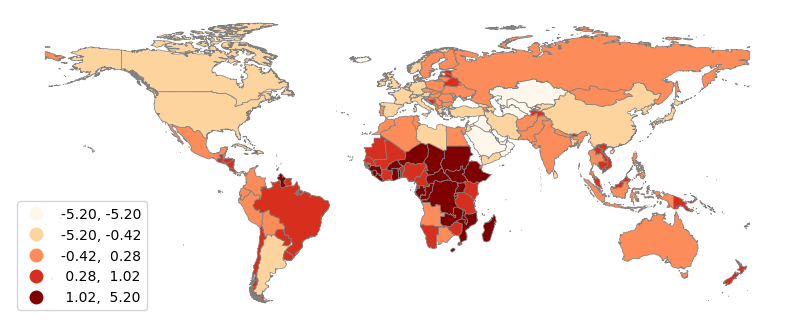

In [95]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='ForestRev_gdp_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [96]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")

In [97]:
#AÑADIR UNA VARIABLE

#Add new DF

import pandas as pd

linkToFile='https://github.com/bnokoro/Data-Science/raw/master/countries%20of%20the%20world.csv'

growthCia=pd.read_csv(linkToFile)

In [98]:
growthCia.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [99]:
growthCia['Country']=growthCia.Country.str.upper()

In [100]:
onlyGrowthCia=set(growthCia.Country)- set(countries.COUNTRY)
onlyMap1=set(countries.COUNTRY)- set(growthCia.Country)

In [101]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap1)) for country in sorted(onlyGrowthCia)]

[('AFGHANISTAN ', ('AFGHANISTAN', 100)),
 ('ALBANIA ', ('ALBANIA', 100)),
 ('ALGERIA ', ('ALGERIA', 100)),
 ('AMERICAN SAMOA ', ('AMERICAN SAMOA (US)', 95)),
 ('ANDORRA ', ('ANDORRA', 100)),
 ('ANGOLA ', ('ANGOLA', 100)),
 ('ANGUILLA ', ('ANGUILLA (UK)', 90)),
 ('ANTIGUA & BARBUDA ', ('ANTIGUA AND BARBUDA', 95)),
 ('ARGENTINA ', ('ARGENTINA', 100)),
 ('ARMENIA ', ('ARMENIA', 100)),
 ('ARUBA ', ('ARUBA (NETHERLANDS)', 90)),
 ('AUSTRALIA ', ('AUSTRALIA', 100)),
 ('AUSTRIA ', ('AUSTRIA', 100)),
 ('AZERBAIJAN ', ('AZERBAIJAN', 100)),
 ('BAHAMAS, THE ', ('BAHAMAS', 90)),
 ('BAHRAIN ', ('BAHRAIN', 100)),
 ('BANGLADESH ', ('BANGLADESH', 100)),
 ('BARBADOS ', ('BARBADOS', 100)),
 ('BELARUS ', ('BELARUS', 100)),
 ('BELGIUM ', ('BELGIUM', 100)),
 ('BELIZE ', ('BELIZE', 100)),
 ('BENIN ', ('BENIN', 100)),
 ('BERMUDA ', ('BERMUDA (UK)', 90)),
 ('BHUTAN ', ('BHUTAN', 100)),
 ('BOLIVIA ', ('BOLIVIA', 100)),
 ('BOSNIA & HERZEGOVINA ', ('BOSNIA AND HERZEGOVINA', 95)),
 ('BOTSWANA ', ('BOTSWANA', 100))

In [102]:
# subsetting
[(country, process.extractOne(country,onlyMap1)) for country in sorted(onlyGrowthCia)
 if process.extractOne(country,onlyMap1)[1]>=90]

[('AFGHANISTAN ', ('AFGHANISTAN', 100)),
 ('ALBANIA ', ('ALBANIA', 100)),
 ('ALGERIA ', ('ALGERIA', 100)),
 ('AMERICAN SAMOA ', ('AMERICAN SAMOA (US)', 95)),
 ('ANDORRA ', ('ANDORRA', 100)),
 ('ANGOLA ', ('ANGOLA', 100)),
 ('ANGUILLA ', ('ANGUILLA (UK)', 90)),
 ('ANTIGUA & BARBUDA ', ('ANTIGUA AND BARBUDA', 95)),
 ('ARGENTINA ', ('ARGENTINA', 100)),
 ('ARMENIA ', ('ARMENIA', 100)),
 ('ARUBA ', ('ARUBA (NETHERLANDS)', 90)),
 ('AUSTRALIA ', ('AUSTRALIA', 100)),
 ('AUSTRIA ', ('AUSTRIA', 100)),
 ('AZERBAIJAN ', ('AZERBAIJAN', 100)),
 ('BAHAMAS, THE ', ('BAHAMAS', 90)),
 ('BAHRAIN ', ('BAHRAIN', 100)),
 ('BANGLADESH ', ('BANGLADESH', 100)),
 ('BARBADOS ', ('BARBADOS', 100)),
 ('BELARUS ', ('BELARUS', 100)),
 ('BELGIUM ', ('BELGIUM', 100)),
 ('BELIZE ', ('BELIZE', 100)),
 ('BENIN ', ('BENIN', 100)),
 ('BERMUDA ', ('BERMUDA (UK)', 90)),
 ('BHUTAN ', ('BHUTAN', 100)),
 ('BOLIVIA ', ('BOLIVIA', 100)),
 ('BOSNIA & HERZEGOVINA ', ('BOSNIA AND HERZEGOVINA', 95)),
 ('BOTSWANA ', ('BOTSWANA', 100))

In [103]:
# then:
try1={country: process.extractOne(country,onlyMap1)[0] for country in sorted(onlyGrowthCia)
 if process.extractOne(country,onlyMap1)[1]>=90}
try1

{'AFGHANISTAN ': 'AFGHANISTAN',
 'ALBANIA ': 'ALBANIA',
 'ALGERIA ': 'ALGERIA',
 'AMERICAN SAMOA ': 'AMERICAN SAMOA (US)',
 'ANDORRA ': 'ANDORRA',
 'ANGOLA ': 'ANGOLA',
 'ANGUILLA ': 'ANGUILLA (UK)',
 'ANTIGUA & BARBUDA ': 'ANTIGUA AND BARBUDA',
 'ARGENTINA ': 'ARGENTINA',
 'ARMENIA ': 'ARMENIA',
 'ARUBA ': 'ARUBA (NETHERLANDS)',
 'AUSTRALIA ': 'AUSTRALIA',
 'AUSTRIA ': 'AUSTRIA',
 'AZERBAIJAN ': 'AZERBAIJAN',
 'BAHAMAS, THE ': 'BAHAMAS',
 'BAHRAIN ': 'BAHRAIN',
 'BANGLADESH ': 'BANGLADESH',
 'BARBADOS ': 'BARBADOS',
 'BELARUS ': 'BELARUS',
 'BELGIUM ': 'BELGIUM',
 'BELIZE ': 'BELIZE',
 'BENIN ': 'BENIN',
 'BERMUDA ': 'BERMUDA (UK)',
 'BHUTAN ': 'BHUTAN',
 'BOLIVIA ': 'BOLIVIA',
 'BOSNIA & HERZEGOVINA ': 'BOSNIA AND HERZEGOVINA',
 'BOTSWANA ': 'BOTSWANA',
 'BRAZIL ': 'BRAZIL',
 'BRUNEI ': 'BRUNEI',
 'BULGARIA ': 'BULGARIA',
 'BURKINA FASO ': 'BURKINA FASO',
 'BURUNDI ': 'BURUNDI',
 'CAMBODIA ': 'CAMBODIA',
 'CAMEROON ': 'CAMEROON',
 'CANADA ': 'CANADA',
 'CAPE VERDE ': 'CAPE VERDE',
 '

In [104]:
growthCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyGrowthCia=set(growthCia.Country)- set(countries.COUNTRY)
onlyMap1=set(countries.COUNTRY)- set(growthCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap1)) for country in sorted(onlyGrowthCia)]

[('BRITISH VIRGIN IS. ', ('BRITISH VIRGIN ISLANDS(UK)', 86)),
 ('BURMA ', ('CURACAO (NETHERLANDS)', 60)),
 ('CENTRAL AFRICAN REP. ', ('CENTRAL AFRICAN REPUBLIC', 88)),
 ("COTE D'IVOIRE ", ('IVORY COAST', 63)),
 ('GAZA STRIP ', ('COCOS (KEELING) ISLANDS (AUSTRALIA)', 48)),
 ('HONG KONG ', ('DEMOCRATIC REPUBLIC OF THE CONGO', 55)),
 ('LAOS ', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 51)),
 ('MACAU ', ('NORTHERN MARIANA ISLANDS (US)', 54)),
 ('MICRONESIA, FED. ST. ', ('ST. LUCIA', 86)),
 ('N. MARIANA ISLANDS ', ('NORTHERN MARIANA ISLANDS (US)', 86)),
 ('SAINT HELENA ', ('ST. HELENA (UK)', 71)),
 ('SAINT KITTS & NEVIS ', ('ST. KITTS AND NEVIS', 81)),
 ('SAINT LUCIA ', ('ST. LUCIA', 80)),
 ('ST PIERRE & MIQUELON ', ('ST. LUCIA', 86)),
 ('SWAZILAND ', ('TOKELAU (NEW ZEALAND)', 64)),
 ('TURKS & CAICOS IS ', ('TURKS AND CAICOS ISLANDS (UK)', 86)),
 ('WEST BANK ', ('BAKER ISLAND (US)', 53))]

In [105]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|ESW|SWA|MYA|HONG|KOS')]

,COUNTRY,geometry
17,BOTSWANA,"POLYGON ((26.40114 -24.63189, 26.38996 -24.627..."
25,MYANMAR,"MULTIPOLYGON (((96.00681 16.38307, 96.06985 16..."
126,LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE),"POLYGON ((104.25700 17.88763, 104.23943 17.937..."
243,ESWATINI,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."


In [106]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'MYANMAR':'BURMA'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyGrowthCia=set(growthCia.Country)- set(countries.COUNTRY)
onlyMap1=set(countries.COUNTRY)- set(growthCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap1)) for country in sorted(onlyGrowthCia)]

[('BRITISH VIRGIN IS. ', ('BRITISH VIRGIN ISLANDS(UK)', 86)),
 ('BURMA ', ('BURMA', 100)),
 ('CENTRAL AFRICAN REP. ', ('CENTRAL AFRICAN REPUBLIC', 88)),
 ("COTE D'IVOIRE ", ('IVORY COAST', 63)),
 ('GAZA STRIP ', ('COCOS (KEELING) ISLANDS (AUSTRALIA)', 48)),
 ('HONG KONG ', ('DEMOCRATIC REPUBLIC OF THE CONGO', 55)),
 ('LAOS ', ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 51)),
 ('MACAU ', ('NORTHERN MARIANA ISLANDS (US)', 54)),
 ('MICRONESIA, FED. ST. ', ('ST. LUCIA', 86)),
 ('N. MARIANA ISLANDS ', ('NORTHERN MARIANA ISLANDS (US)', 86)),
 ('SAINT HELENA ', ('ST. HELENA (UK)', 71)),
 ('SAINT KITTS & NEVIS ', ('ST. KITTS AND NEVIS', 81)),
 ('SAINT LUCIA ', ('ST. LUCIA', 80)),
 ('ST PIERRE & MIQUELON ', ('ST. LUCIA', 86)),
 ('SWAZILAND ', ('TOKELAU (NEW ZEALAND)', 64)),
 ('TURKS & CAICOS IS ', ('TURKS AND CAICOS ISLANDS (UK)', 86)),
 ('WEST BANK ', ('BAKER ISLAND (US)', 53))]

In [107]:
# then:
try2={country: process.extractOne(country,onlyMap1)[0] for country in sorted(onlyGrowthCia)}
try2

{'BRITISH VIRGIN IS. ': 'BRITISH VIRGIN ISLANDS(UK)',
 'BURMA ': 'BURMA',
 'CENTRAL AFRICAN REP. ': 'CENTRAL AFRICAN REPUBLIC',
 "COTE D'IVOIRE ": 'IVORY COAST',
 'GAZA STRIP ': 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'HONG KONG ': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'LAOS ': "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MACAU ': 'NORTHERN MARIANA ISLANDS (US)',
 'MICRONESIA, FED. ST. ': 'ST. LUCIA',
 'N. MARIANA ISLANDS ': 'NORTHERN MARIANA ISLANDS (US)',
 'SAINT HELENA ': 'ST. HELENA (UK)',
 'SAINT KITTS & NEVIS ': 'ST. KITTS AND NEVIS',
 'SAINT LUCIA ': 'ST. LUCIA',
 'ST PIERRE & MIQUELON ': 'ST. LUCIA',
 'SWAZILAND ': 'TOKELAU (NEW ZEALAND)',
 'TURKS & CAICOS IS ': 'TURKS AND CAICOS ISLANDS (UK)',
 'WEST BANK ': 'BAKER ISLAND (US)'}

In [108]:
# changing
growthCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyGrowthCia=set(growthCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(growthCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap1)) for country in sorted(onlyGrowthCia)]

[]

In [109]:
df1=countries.merge(growthCia,left_on='COUNTRY', right_on='Country')

df1.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   COUNTRY                             227 non-null    object  
 1   geometry                            227 non-null    geometry
 2   Region                              227 non-null    object  
 3   Population                          227 non-null    int64   
 4   Area (sq. mi.)                      227 non-null    int64   
 5   Pop. Density (per sq. mi.)          227 non-null    object  
 6   Coastline (coast/area ratio)        227 non-null    object  
 7   Net migration                       224 non-null    object  
 8   Infant mortality (per 1000 births)  224 non-null    object  
 9   GDP ($ per capita)                  226 non-null    float64 
 10  Literacy (%)                        209 non-null    object  
 11  Phones (per 1000)       

In [118]:
#PROBLEMA2

#EXERCISE 1

linkWorldMap="https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"


import geopandas as gpd
from  fiona import listlayers
listlayers(linkWorldMap)

['countries', 'rivers', 'cities', 'indicators']

In [112]:
countries=gpd.read_file(linkWorldMap,layer='countries')
rivers=gpd.read_file(linkWorldMap,layer='rivers')
cities=gpd.read_file(linkWorldMap,layer='cities')
indicators=gpd.read_file(linkWorldMap,layer='indicators')

In [113]:
countries.cx[:40,:50]

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
5,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472..."
7,Andorra,"POLYGON ((1.44583 42.60194, 1.48653 42.65041, ..."
...,...,...
245,Zambia,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096..."
246,Zimbabwe,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325..."
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


<Axes: >

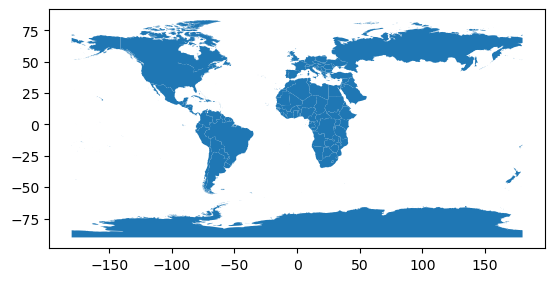

In [114]:
#then
countries.cx[:40,:50].plot()

In [115]:
switzerland =countries[countries.COUNTRY=='Switzerland']

In [116]:
citiesSwitzerland_clipped = gpd.clip(gdf=cities,
                          mask=switzerland)
riversSwitzerland_clipped = gpd.clip(gdf=rivers,
                               mask=switzerland)

<Axes: >

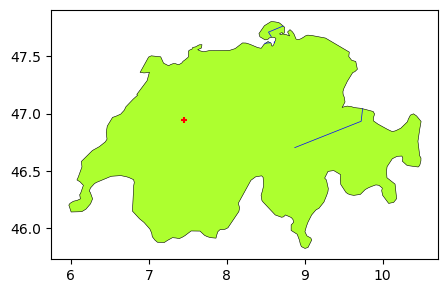

In [117]:
base = switzerland.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesSwitzerland_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversSwitzerland_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

In [119]:
#EXERCISE 2


switzerland.to_crs(2056).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [120]:
# now this works with no warning
switzerland.to_crs(2056).centroid

210    POINT (2660562.350 1183909.065)
dtype: geometry

<Axes: >

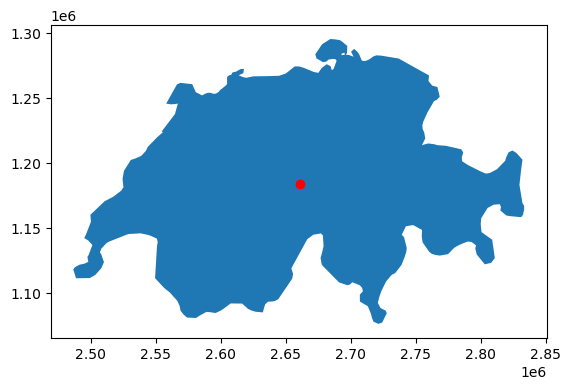

In [121]:
# replotting:

base2056=switzerland.to_crs(2056).plot()
switzerland.to_crs(2056).centroid.plot(color='red',ax=base2056)

In [122]:
switzerland_2056=switzerland.to_crs(2056)
cities_switzerland_2056=citiesSwitzerland_clipped.to_crs(switzerland_2056.crs)
rivers_switzerland_2056=riversSwitzerland_clipped.to_crs(switzerland_2056.crs)

In [123]:
## saving


import os

switzerland_2056.to_file(os.path.join("maps","switzerlandMaps_2056.gpkg"), layer='country', driver="GPKG")
cities_switzerland_2056.to_file(os.path.join("maps","switzerlandMaps_2056.gpkg"), layer='cities', driver="GPKG")
rivers_switzerland_2056.to_file(os.path.join("maps","switzerlandMaps_2056.gpkg"), layer='rivers', driver="GPKG")
switzerland_2056.centroid.to_file(os.path.join("maps","switzerlandMaps_2056.gpkg"), layer='centroid', driver="GPKG")

In [124]:
#EXERCISE 3

import pandas as pd
infoairports=pd.read_csv(os.path.join("data","ch-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,4505,LSZH,large_airport,Zürich Airport,47.458056,8.548056,1417.0,EU,Switzerland,CH,...,Zurich,1,LSZH,ZRH,NaN,http://www.zurich-airport.com/,https://en.wikipedia.org/wiki/Zurich_Airport,NaN,1025475,2021-01-31T15:21:43+00:00
1,4490,LSGG,large_airport,Geneva Cointrin International Airport,46.238098,6.108950,1411.0,EU,Switzerland,CH,...,Geneva,1,LSGG,GVA,NaN,http://www.gva.ch/,https://en.wikipedia.org/wiki/Geneva_Cointrin_...,NaN,51275,2023-11-19T17:30:48+00:00
2,4503,LSZB,medium_airport,Bern Airport,46.912868,7.498512,1671.0,EU,Switzerland,CH,...,Bern,1,LSZB,BRN,NaN,https://www.bernairport.ch/de/,https://en.wikipedia.org/wiki/Bern_Airport,"LSZB, Belp, Bern-Belp, Bern-Belp Regional Airf...",500,2023-11-08T05:44:39+00:00
3,4492,LSGS,medium_airport,Sion Airport,46.219166,7.326944,1582.0,EU,Switzerland,CH,...,Sion,0,LSGS,SIR,NaN,http://www.sionairport.ch,https://en.wikipedia.org/wiki/Sion_Airport,LSMS,300,2023-11-19T17:31:19+00:00
120,513826,CH-0011,heliport,Zürich Triemli City Hospital Heliport,47.366516,8.497469,NaN,EU,Switzerland,CH,...,Zürich,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-11-02T12:34:56+00:00
121,513828,CH-0013,heliport,Zürich Waid City Hospital Heliport,47.398104,8.521438,1594.0,EU,Switzerland,CH,...,Zürich,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-10-26T15:35:56+00:00
122,513829,CH-0014,heliport,Zurich Children's Hospital Heliport,47.372022,8.557160,NaN,EU,Switzerland,CH,...,Zürich,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-10-26T15:37:14+00:00
123,513830,CH-0015,heliport,University Hospital of Zurich Heliport,47.376917,8.551108,NaN,EU,Switzerland,CH,...,Zürich,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-10-26T15:39:07+00:00


In [125]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           124 non-null    object 
 1   type           124 non-null    object 
 2   latitude_deg   124 non-null    float64
 3   longitude_deg  124 non-null    float64
 4   elevation_ft   87 non-null     float64
 5   region_name    124 non-null    object 
 6   municipality   112 non-null    object 
dtypes: float64(3), object(4)
memory usage: 6.9+ KB


In [126]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

<Axes: >

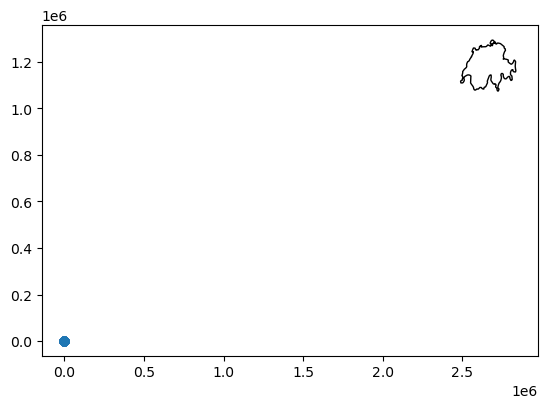

In [127]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=switzerland.crs.to_epsg())# the coordinates were in degrees - unprojected

# let's plot

base = switzerland_2056.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [128]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

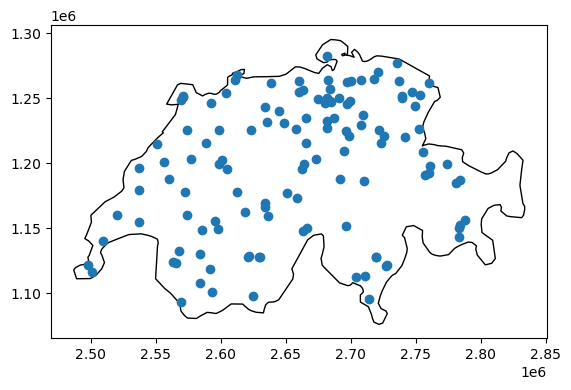

In [129]:
airports_2056=airports.to_crs(2056)

## then

base = switzerland_2056.plot(color='white', edgecolor='black')
airports_2056.plot(ax=base)

In [130]:
airports_2056['type'].value_counts() # this will not work: airports.type.value_counts()

type
heliport          51
small_airport     50
medium_airport    11
closed            10
large_airport      2
Name: count, dtype: int64

In [131]:
airports_2056.rename(columns={'type':'kind'},inplace=True)

## adding the airports to GPKG
airports_2056.to_file(os.path.join("maps","switzerlandMaps_2056.gpkg"), layer='airports', driver="GPKG")

In [132]:
#EXERCISE 4

switzerland_2056

,COUNTRY,geometry
210,Switzerland,"POLYGON ((2524351.653 1188067.976, 2525446.992..."


In [133]:
switzerland_2056.boundary

210    MULTILINESTRING ((2524351.653 1188067.976, 252...
dtype: geometry

<Axes: >

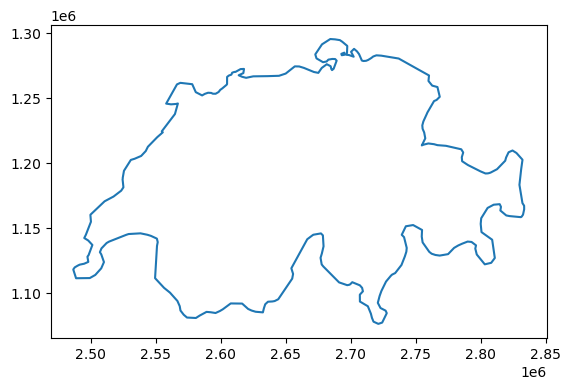

In [134]:
# This is just the borderline
switzerland_2056.boundary.plot()

In [135]:
# does 'boundary' return a GDF?
type(switzerland_2056.boundary)

geopandas.geoseries.GeoSeries

In [136]:
# converting into GDF
switzerland_2056.boundary.to_frame()

,0
210,"MULTILINESTRING ((2524351.653 1188067.976, 252..."


In [137]:
# conversion
switzerland_border=switzerland_2056.boundary.to_frame()

# new column (optional)
switzerland_border['name']='Switzerland'

# renaming the geometry column
switzerland_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
switzerland_border = switzerland_border.set_geometry("geometry")

# verifying:
switzerland_border.crs

<Projected CRS: EPSG:2056>
Name: CH1903+ / LV95
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Liechtenstein; Switzerland.
- bounds: (5.96, 45.82, 10.49, 47.81)
Coordinate Operation:
- name: Swiss Oblique Mercator 1995
- method: Hotine Oblique Mercator (variant B)
Datum: CH1903+
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [139]:
#EXERCISE 5

switzerland_states=gpd.read_file(os.path.join("maps2","Historized_communes_1850_2016_shp","Historized_communes_1850_2016.shp"))
switzerland_municipalities=gpd.read_file(os.path.join("maps2","Historized_communes_1850_2016_shp","Historized_communes_1850_2016.shp"))

In [140]:
type(switzerland_states), type(switzerland_municipalities)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [141]:
switzerland_states.geometry.head()

0    POLYGON ((2680610.844 1236346.845, 2680592.844...
1    POLYGON ((2680610.844 1236346.845, 2680592.844...
2    POLYGON ((2676170.815 1235531.855, 2676150.815...
3    POLYGON ((2676837.841 1243164.830, 2676882.840...
4    POLYGON ((2680610.844 1236346.845, 2680607.844...
Name: geometry, dtype: geometry

In [142]:
switzerland_municipalities.geometry.head()

0    POLYGON ((2680610.844 1236346.845, 2680592.844...
1    POLYGON ((2680610.844 1236346.845, 2680592.844...
2    POLYGON ((2676170.815 1235531.855, 2676150.815...
3    POLYGON ((2676837.841 1243164.830, 2676882.840...
4    POLYGON ((2680610.844 1236346.845, 2680607.844...
Name: geometry, dtype: geometry

<Axes: >

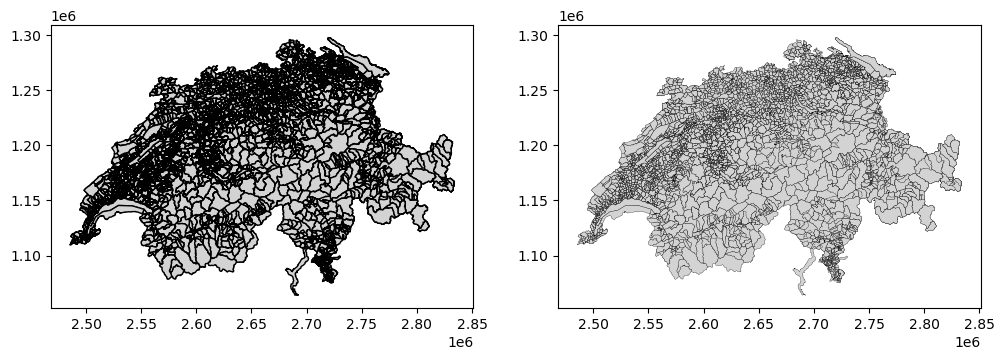

In [143]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

switzerland_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
switzerland_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [144]:
switzerland_states.to_crs(2056)

,GDEHISTID,GDENR,GDENAME,BEZHISTID,BEZNR,BEZNAME,KTNR,KTKZ,CODE_ISO,ARTID,...,N_MIN,E_MAX,N_MAX,Z_CNTR,Z_MIN,Z_MAX,Z_AVG,Z_MED,PUBDATE,geometry
0,13256,1,Aeugst am Albis,10053,101,Bezirk Affoltern,1,ZH,CH,11,...,1234585,2681156,1238540,700.0,533.0,885.0,684.0,673.0,2023-12-20,"POLYGON ((2680610.844 1236346.845, 2680592.844..."
1,11348,1,Aeugst,10053,101,Bezirk Affoltern,1,ZH,CH,11,...,1234585,2681156,1238540,700.0,533.0,885.0,684.0,673.0,2023-12-20,"POLYGON ((2680610.844 1236346.845, 2680592.844..."
2,11742,2,Affoltern am Albis,10053,101,Bezirk Affoltern,1,ZH,CH,11,...,1235217,2678571,1239340,490.0,440.0,749.0,528.0,501.0,2023-12-20,"POLYGON ((2676170.815 1235531.855, 2676150.815..."
3,11801,3,Bonstetten,10053,101,Bezirk Affoltern,1,ZH,CH,11,...,1239005,2679646,1243165,544.0,502.0,712.0,580.0,582.0,2023-12-20,"POLYGON ((2676837.841 1243164.830, 2676882.840..."
4,11992,4,Hausen am Albis,10053,101,Bezirk Affoltern,1,ZH,CH,11,...,1230170,2686461,1236412,609.0,524.0,914.0,674.0,653.0,2023-12-20,"POLYGON ((2680610.844 1236346.845, 2680607.844..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,90001,9790,"Bodensee (D, A)",0,0,None,0,None,DA,13,...,1261804,2774369,1297582,395.0,391.0,402.0,395.0,395.0,2023-12-20,"POLYGON ((2730670.827 1279696.449, 2730691.864..."
6217,90004,9791,Lago di Lugano (I),0,0,None,0,None,IT,13,...,1084533,2730579,1099669,270.0,270.0,281.0,270.0,270.0,2023-12-20,"MULTIPOLYGON (((2730002.739 1099540.420, 27300..."
6218,90006,9792,Lago Maggiore (I),0,0,None,0,None,IT,13,...,1064039,2701860,1108697,193.0,193.0,212.0,193.0,193.0,2023-12-20,"POLYGON ((2697317.344 1106369.064, 2697547.969..."
6219,90005,9793,Lac Léman (F),0,0,None,0,None,FR,13,...,1128792,2552530,1145409,372.0,372.0,375.0,372.0,372.0,2023-12-20,"POLYGON ((2551289.338 1138278.322, 2551288.963..."


In [145]:
# set as unprojected
switzerland_states.crs = "EPSG:2056"
switzerland_municipalities.crs = "EPSG:2056"

In [146]:
switzerland_states=switzerland_states.to_crs(2056)
switzerland_municipalities=switzerland_municipalities.to_crs(2056)

<Axes: >

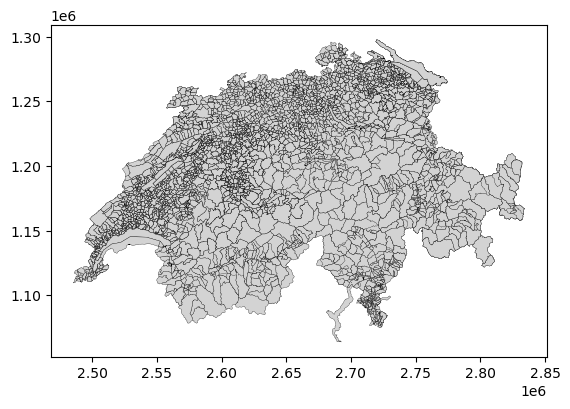

In [147]:
#EXERCISE 6

switzerland_municipalities.plot(facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [148]:
#see
switzerland_municipalities.head()

,GDEHISTID,GDENR,GDENAME,BEZHISTID,BEZNR,BEZNAME,KTNR,KTKZ,CODE_ISO,ARTID,...,N_MIN,E_MAX,N_MAX,Z_CNTR,Z_MIN,Z_MAX,Z_AVG,Z_MED,PUBDATE,geometry
0,13256,1,Aeugst am Albis,10053,101,Bezirk Affoltern,1,ZH,CH,11,...,1234585,2681156,1238540,700.0,533.0,885.0,684.0,673.0,2023-12-20,"POLYGON ((2680610.844 1236346.845, 2680592.844..."
1,11348,1,Aeugst,10053,101,Bezirk Affoltern,1,ZH,CH,11,...,1234585,2681156,1238540,700.0,533.0,885.0,684.0,673.0,2023-12-20,"POLYGON ((2680610.844 1236346.845, 2680592.844..."
2,11742,2,Affoltern am Albis,10053,101,Bezirk Affoltern,1,ZH,CH,11,...,1235217,2678571,1239340,490.0,440.0,749.0,528.0,501.0,2023-12-20,"POLYGON ((2676170.815 1235531.855, 2676150.815..."
3,11801,3,Bonstetten,10053,101,Bezirk Affoltern,1,ZH,CH,11,...,1239005,2679646,1243165,544.0,502.0,712.0,580.0,582.0,2023-12-20,"POLYGON ((2676837.841 1243164.830, 2676882.840..."
4,11992,4,Hausen am Albis,10053,101,Bezirk Affoltern,1,ZH,CH,11,...,1230170,2686461,1236412,609.0,524.0,914.0,674.0,653.0,2023-12-20,"POLYGON ((2680610.844 1236346.845, 2680607.844..."


In [149]:
# higher level
switzerland_municipalities.BEZNAME.value_counts()

BEZNAME
Distretto di Lugano                     135
District de Morges                      107
Verwaltungskreis Bern-Mittelland        104
District de Moutier                      90
Amtsbezirk Thun                          90
                                       ... 
Bezirk Küssnacht (SZ)                     1
Bezirk Solothurn                          1
Bezirksfreies Gebiet Aargau               1
Bezirksfreies Gebiet Schaffhausen         1
Région sans district Valais / Wallis      1
Name: count, Length: 239, dtype: int64

<Axes: >

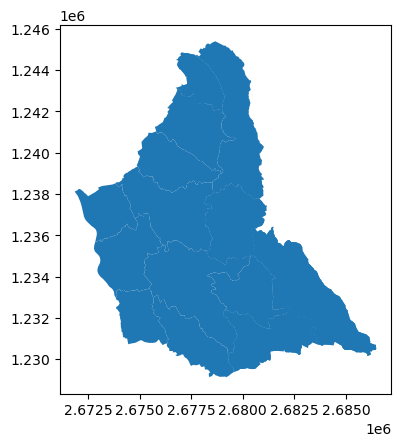

In [150]:
switzerland_municipalities[switzerland_municipalities.BEZNAME=='Bezirk Affoltern'].plot()

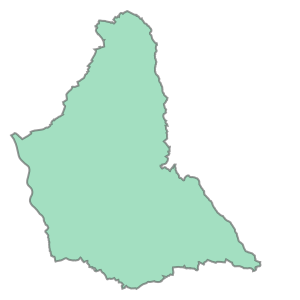

In [151]:
#UNION
switzerland_municipalities[switzerland_municipalities.BEZNAME=='Bezirk Affoltern'].unary_union

In [152]:
BezirkAffoltern_union=switzerland_municipalities[switzerland_municipalities.BEZNAME=='Bezirk Affoltern'].unary_union

In [153]:
# what do we have?
type(BezirkAffoltern_union)

shapely.geometry.polygon.Polygon

In [154]:
gpd.GeoDataFrame(index=[0],data={'BEZNAME':'Bezirk Affoltern'},
                 crs=switzerland_municipalities.crs,
                 geometry=[BezirkAffoltern_union])

,BEZNAME,geometry
0,Bezirk Affoltern,"POLYGON ((2683672.808 1230714.866, 2683610.807..."


<Axes: >

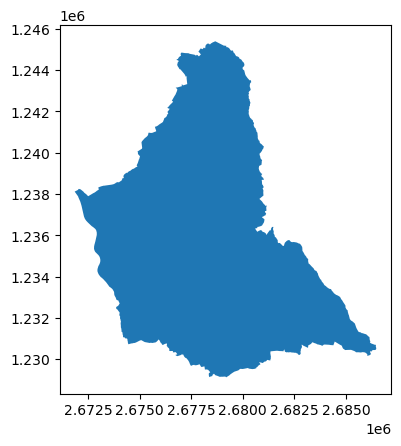

In [155]:
#DISSOLVE

switzerland_municipalities[switzerland_municipalities.BEZNAME=='Bezirk Affoltern'].dissolve().plot()

In [156]:
BezirkAffoltern_dissolve=switzerland_municipalities[switzerland_municipalities.BEZNAME=='Bezirk Affoltern'].dissolve()

# we got?
type(BezirkAffoltern_dissolve)

geopandas.geodataframe.GeoDataFrame

In [157]:
## see
BezirkAffoltern_dissolve

,geometry,GDEHISTID,GDENR,GDENAME,BEZHISTID,BEZNR,BEZNAME,KTNR,KTKZ,CODE_ISO,...,E_MIN,N_MIN,E_MAX,N_MAX,Z_CNTR,Z_MIN,Z_MAX,Z_AVG,Z_MED,PUBDATE
0,"POLYGON ((2683672.808 1230714.866, 2683610.807...",13256,1,Aeugst am Albis,10053,101,Bezirk Affoltern,1,ZH,CH,...,2678118,1234585,2681156,1238540,700.0,533.0,885.0,684.0,673.0,2023-12-20


In [158]:
# keeping what is relevant
BezirkAffoltern_dissolve.drop(columns=['GDENAME','BEZHISTID','BEZNR'],inplace=True)

# then
BezirkAffoltern_dissolve

,geometry,GDEHISTID,GDENR,BEZNAME,KTNR,KTKZ,CODE_ISO,ARTID,VALID_FROM,VALID_UNTI,...,E_MIN,N_MIN,E_MAX,N_MAX,Z_CNTR,Z_MIN,Z_MAX,Z_AVG,Z_MED,PUBDATE
0,"POLYGON ((2683672.808 1230714.866, 2683610.807...",13256,1,Bezirk Affoltern,1,ZH,CH,11,1976-11-15,2016-12-31,...,2678118,1234585,2681156,1238540,700.0,533.0,885.0,684.0,673.0,2023-12-20


<Axes: >

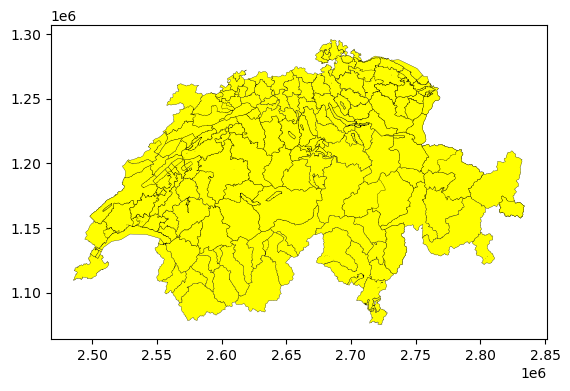

In [159]:
# dissolving
switzerland_municipalities.dissolve(by='BEZNAME').plot(facecolor='yellow', edgecolor='black',linewidth=0.2)

In [160]:
Switzerland_adm1_diss=switzerland_municipalities.dissolve(by='BEZNAME')

In [161]:
Switzerland_adm1_diss

,geometry,GDEHISTID,GDENR,GDENAME,BEZHISTID,BEZNR,KTNR,KTKZ,CODE_ISO,ARTID,...,E_MIN,N_MIN,E_MAX,N_MAX,Z_CNTR,Z_MIN,Z_MAX,Z_AVG,Z_MED,PUBDATE
BEZNAME,,,,,,,,,,,,,,,,,,,,,
Aeusserer Landesteil,"POLYGON ((2763232.009 1253683.869, 2763178.324...",10834,3111,Oberegg,10198,1602,16,AI,CH,11,...,2756238,1251285,2764420,1256398,872.0,541.0,1135.0,870.0,881.0,2023-12-20
Amt Entlebuch,"POLYGON ((2639303.400 1182694.917, 2639318.401...",12174,1001,Doppleschwand,10066,301,3,LU,CH,11,...,2645086,1205148,2647809,1209235,750.0,593.0,970.0,759.0,752.0,2023-12-20
Amt Hochdorf,"POLYGON ((2667490.794 1215914.899, 2667365.797...",11748,1021,Aesch (LU),10065,302,3,LU,CH,11,...,2659703,1232925,2662531,1236207,479.0,448.0,635.0,497.0,482.0,2023-12-20
Amt Luzern,"MULTIPOLYGON (((2660778.790 1204839.953, 26606...",11743,1051,Adligenswil,10064,303,3,LU,CH,11,...,2668499,1212170,2672601,1215480,535.0,459.0,750.0,587.0,580.0,2023-12-20
Amt Sursee,"POLYGON ((2647895.648 1211623.010, 2647878.963...",11864,1081,Beromünster,10063,304,3,LU,CH,11,...,2656456,1226830,2658248,1229347,641.0,613.0,695.0,653.0,652.0,2023-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wahlkreis Sursee,"POLYGON ((2657538.743 1213374.955, 2657508.742...",15663,1081,Beromünster,10301,314,3,LU,CH,11,...,2652631,1223147,2660421,1233775,641.0,448.0,853.0,703.0,703.0,2023-12-20
Wahlkreis Toggenburg,"POLYGON ((2736488.792 1223542.785, 2736463.793...",14434,3351,Alt St. Johann,10264,1727,17,SG,CH,11,...,2735029,1223063,2743949,1232552,890.0,853.0,2306.0,1419.0,1405.0,2023-12-20
Wahlkreis Werdenberg,"POLYGON ((2749098.688 1216354.750, 2749140.689...",14405,3271,Buchs (SG),10267,1724,17,SG,CH,11,...,2748596,1222528,2756544,1230000,450.0,439.0,2229.0,750.0,450.0,2023-12-20


In [162]:
Switzerland_adm1_diss.drop(columns=['GDENAME','BEZHISTID','BEZNR'],inplace=True)
Switzerland_adm1_diss.reset_index(inplace=True)
Switzerland_adm1_diss.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BEZNAME     239 non-null    object  
 1   geometry    239 non-null    geometry
 2   GDEHISTID   239 non-null    int64   
 3   GDENR       239 non-null    int64   
 4   KTNR        239 non-null    int64   
 5   KTKZ        239 non-null    object  
 6   CODE_ISO    239 non-null    object  
 7   ARTID       239 non-null    int64   
 8   VALID_FROM  239 non-null    object  
 9   VALID_UNTI  239 non-null    object  
 10  LAKENR      239 non-null    int64   
 11  LAKENAME    19 non-null     object  
 12  FLAG_ID     239 non-null    int64   
 13  MOD_GEOM    239 non-null    int64   
 14  INIMUT      239 non-null    int64   
 15  FINMUT      239 non-null    int64   
 16  E_CNTR      239 non-null    int64   
 17  N_CNTR      239 non-null    int64   
 18  E_MIN       239 non-null    int64   
 19  

In [163]:
#EXERCISE 7

switzerland_2056.centroid

210    POINT (2660562.350 1183909.065)
dtype: geometry

In [164]:
# then
switzerland_2056.centroid.x.values[0],switzerland_2056.centroid.y.values[0]

(2660562.3501682645, 1183909.0647437451)

In [165]:
airports_2056

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Zürich Airport,large_airport,47.458056,8.548056,1417.0,Zürich,Zurich,POINT (2683656.298 1256954.707)
1,Geneva Cointrin International Airport,large_airport,46.238098,6.108950,1411.0,Geneva,Geneva,POINT (2497436.390 1121610.869)
2,Bern Airport,medium_airport,46.912868,7.498512,1671.0,Bern,Bern,POINT (2604561.585 1195753.337)
3,Sion Airport,medium_airport,46.219166,7.326944,1582.0,Valais,Sion,POINT (2591380.721 1118641.514)
4,Sankt Gallen Altenrhein Airport,medium_airport,47.485001,9.560770,1306.0,St. Gallen,St. Gallen,POINT (2759924.446 1261522.213)
...,...,...,...,...,...,...,...,...
119,Zermatt Heliport,heliport,46.029320,7.753366,NaN,Valais,Zermatt,POINT (2624369.500 1097579.411)
120,Zürich Triemli City Hospital Heliport,heliport,47.366516,8.497469,NaN,Zürich,Zürich,POINT (2679979.366 1246725.207)
121,Zürich Waid City Hospital Heliport,heliport,47.398104,8.521438,1594.0,Zürich,Zürich,POINT (2681741.282 1250261.606)
122,Zurich Children's Hospital Heliport,heliport,47.372022,8.557160,NaN,Zürich,Zürich,POINT (2684479.080 1247399.864)


In [166]:
# coordinates
centroidX,centroidY=switzerland_2056.centroid.x.values[0],switzerland_2056.centroid.y.values[0]

# subsets of medium airports
Switzerland_AirTopLeft=airports_2056[airports_2056.kind=='medium_airport'].cx[:centroidX,centroidY:]
Switzerland_AirTopRight=airports_2056[airports_2056.kind=='medium_airport'].cx[centroidX:,centroidY:]
Switzerland_AirBottomLeft=airports_2056[airports_2056.kind=='medium_airport'].cx[:centroidX,:centroidY]
Switzerland_AirBottomRight=airports_2056[airports_2056.kind=='medium_airport'].cx[centroidX:,:centroidY]

<Axes: >

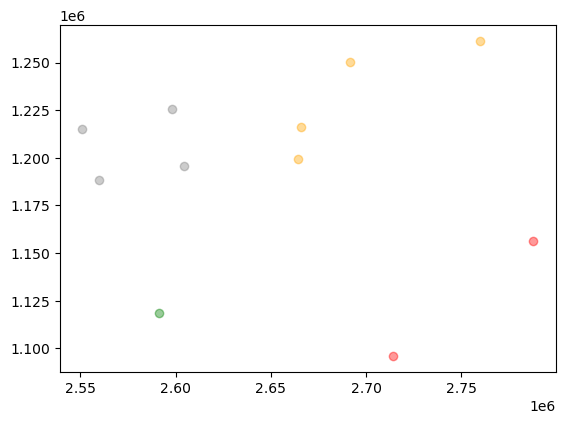

In [167]:
base=Switzerland_AirTopLeft.plot(facecolor='grey', alpha=0.4)
Switzerland_AirTopRight.plot(ax=base,facecolor='orange', alpha=0.4)
Switzerland_AirBottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
Switzerland_AirBottomRight.plot(ax=base,facecolor='red', alpha=0.4)

In [168]:
Switzerland_AirTopRight

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
4,Sankt Gallen Altenrhein Airport,medium_airport,47.485001,9.560770,1306.0,St. Gallen,St. Gallen,POINT (2759924.446 1261522.213)
29,Dübendorf Air Base,medium_airport,47.398602,8.648230,1470.0,Zürich,Zurich,POINT (2691311.205 1250456.780)
53,Emmen Air Base,medium_airport,47.092444,8.305184,1400.0,Lucerne,NaN,POINT (2665792.245 1216078.232)
54,Alpnach Air Base,medium_airport,46.943901,8.284170,1460.0,Obwalden,Alpnach,POINT (2664374.728 1199547.944)


<Axes: >

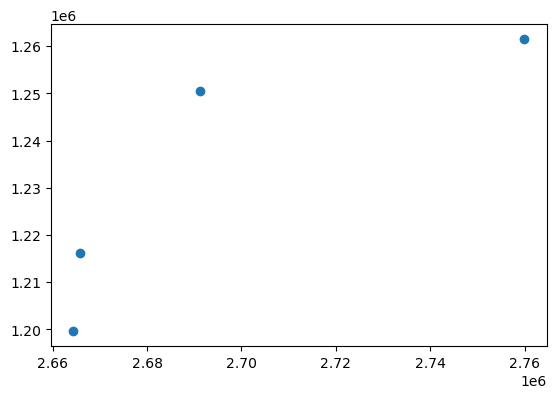

In [169]:
Switzerland_AirTopRight.convex_hull.plot()

In [170]:
Switzerland_AirTopRight.dissolve().convex_hull

0    POLYGON ((2664374.728 1199547.944, 2665792.245...
dtype: geometry

<Axes: >

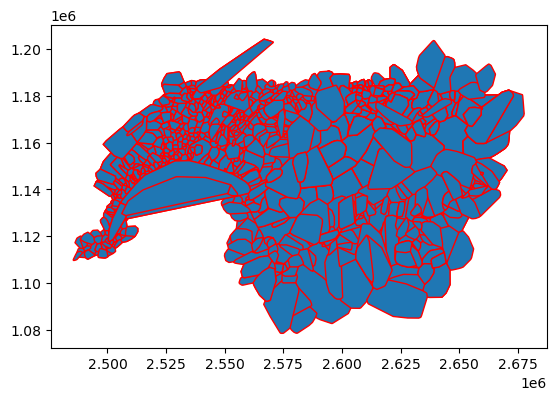

In [171]:
switzerland_municipalities.cx[:centroidX,:centroidY].convex_hull.plot(edgecolor='red')

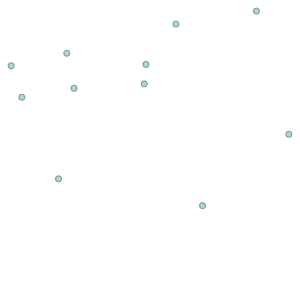

In [172]:
# just the union
medium_airport=airports_2056[airports_2056.kind=='medium_airport']
medium_airport.unary_union

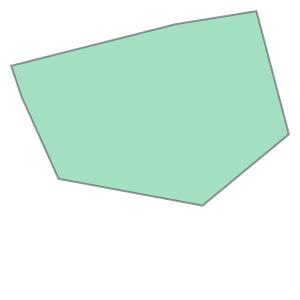

In [173]:
# hull of the union
medium_airport.unary_union.convex_hull

In [174]:
MediumAirport_hull= gpd.GeoDataFrame(index=[0],
                                    crs=medium_airport.crs,
                                    geometry=[medium_airport.unary_union.convex_hull])
MediumAirport_hull['name']='medium airports hull' # optional

# then

MediumAirport_hull

,geometry,name
0,"POLYGON ((2714021.463 1095818.418, 2591380.721...",medium airports hull


<Axes: >

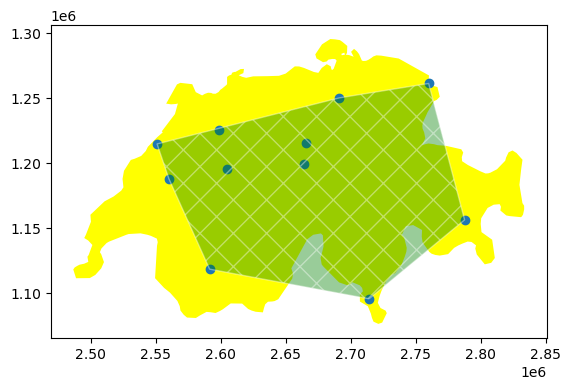

In [176]:
base=switzerland_2056.plot(facecolor='yellow')
medium_airport.plot(ax=base)
MediumAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

In [177]:
#EXERCISE 8

# the north
MunisN_switzerland=switzerland_municipalities.cx[:,centroidY:]
# the south
MunisS_switzerland=switzerland_municipalities.cx[:,:centroidY]
# the west
MunisW_switzerland=switzerland_municipalities.cx[:centroidX,:]
# the east
MunisE_switzerland=switzerland_municipalities.cx[centroidX:,:]

<Axes: >

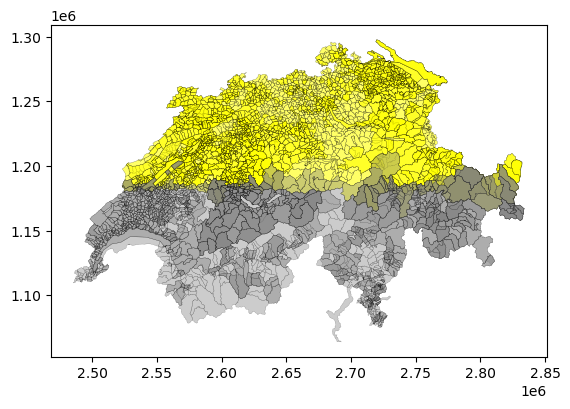

In [178]:
base=MunisN_switzerland.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
MunisS_switzerland.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

<Axes: >

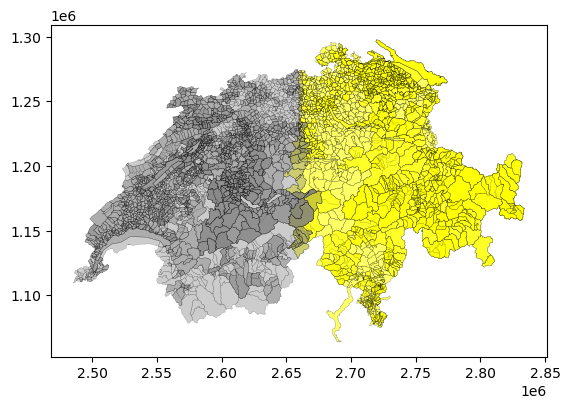

In [179]:
base=MunisE_switzerland.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
MunisW_switzerland.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

D:\anaconda\Lib\site-packages\geopandas\geodataframe.py:1815: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union


<Axes: >

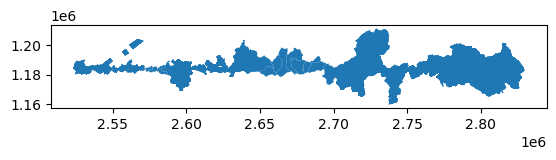

In [180]:
#INTERSECTION

munisNS_switzerland=MunisN_switzerland.overlay(MunisS_switzerland, how="intersection",keep_geom_type=True)
munisNS_switzerland.plot()

<Axes: >

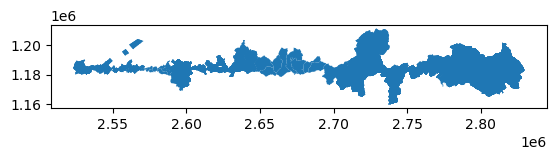

In [181]:
MunisN_switzerland.sjoin(MunisS_switzerland, how="inner", predicate='contains').plot()

D:\anaconda\Lib\site-packages\geopandas\geodataframe.py:1815: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union


<Axes: >

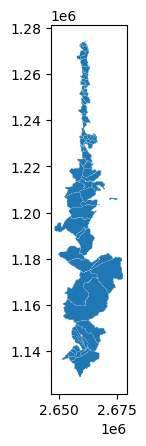

In [182]:
# keeping the overlay
munisWE_switzerland=MunisW_switzerland.overlay(MunisE_switzerland, how="intersection",keep_geom_type=True)
munisWE_switzerland.plot(edgecolor='white',linewidth=0.1)

In [183]:
munisNS_switzerland.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GDEHISTID_1   1310 non-null   int64   
 1   GDENR_1       1310 non-null   int64   
 2   GDENAME_1     1310 non-null   object  
 3   BEZHISTID_1   1310 non-null   int64   
 4   BEZNR_1       1310 non-null   int64   
 5   BEZNAME_1     1310 non-null   object  
 6   KTNR_1        1310 non-null   int64   
 7   KTKZ_1        1310 non-null   object  
 8   CODE_ISO_1    1310 non-null   object  
 9   ARTID_1       1310 non-null   int64   
 10  VALID_FROM_1  1310 non-null   object  
 11  VALID_UNTI_1  1310 non-null   object  
 12  LAKENR_1      1310 non-null   int64   
 13  LAKENAME_1    47 non-null     object  
 14  FLAG_ID_1     1310 non-null   int64   
 15  MOD_GEOM_1    1310 non-null   int64   
 16  INIMUT_1      1310 non-null   int64   
 17  FINMUT_1      1310 non-null   int64   
 18  

In [184]:
munisWE_switzerland.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GDEHISTID_1   263 non-null    int64   
 1   GDENR_1       263 non-null    int64   
 2   GDENAME_1     263 non-null    object  
 3   BEZHISTID_1   263 non-null    int64   
 4   BEZNR_1       263 non-null    int64   
 5   BEZNAME_1     263 non-null    object  
 6   KTNR_1        263 non-null    int64   
 7   KTKZ_1        263 non-null    object  
 8   CODE_ISO_1    263 non-null    object  
 9   ARTID_1       263 non-null    int64   
 10  VALID_FROM_1  263 non-null    object  
 11  VALID_UNTI_1  263 non-null    object  
 12  LAKENR_1      263 non-null    int64   
 13  LAKENAME_1    1 non-null      object  
 14  FLAG_ID_1     263 non-null    int64   
 15  MOD_GEOM_1    263 non-null    int64   
 16  INIMUT_1      263 non-null    int64   
 17  FINMUT_1      263 non-null    int64   
 18  E_

In [185]:
keep=['GDENAME_1','BEZNAME_1','GDENAME_2','geometry']
munisNS_switzerland=munisNS_switzerland.loc[:,keep]
munisWE_switzerland=munisWE_switzerland.loc[:,keep]

In [186]:
# now
munisNS_switzerland.overlay(munisWE_switzerland,how="union",keep_geom_type=True)

,GDENAME_1_1,BEZNAME_1_1,GDENAME_2_1,GDENAME_1_2,BEZNAME_1_2,GDENAME_2_2,geometry
0,Lungern,Kanton Obwalden,Lungern,Lungern,Kanton Obwalden,Lungern,"POLYGON ((2649740.480 1182039.835, 2649788.480..."
1,Sachseln,Kanton Obwalden,Sachseln,Sachseln,Kanton Obwalden,Sachseln,"POLYGON ((2661345.610 1192512.848, 2661365.611..."
2,Rüschegg,Amtsbezirk Schwarzenburg,Wahlern,NaN,NaN,NaN,"POLYGON ((2593737.977 1181700.030, 2593737.977..."
3,Rüschegg,Amtsbezirk Schwarzenburg,Wahlern,NaN,NaN,NaN,"POLYGON ((2593737.977 1181700.030, 2593737.977..."
4,Rüschegg,Verwaltungskreis Bern-Mittelland,Wahlern,NaN,NaN,NaN,"POLYGON ((2593737.977 1181700.030, 2593737.977..."
...,...,...,...,...,...,...,...
1566,NaN,NaN,NaN,Ritzingen,Bezirk Goms,Ritzingen,"POLYGON ((2659697.902 1146209.650, 2659732.903..."
1567,NaN,NaN,NaN,Grafschaft,Bezirk Goms,Ritzingen,"POLYGON ((2659697.902 1146209.650, 2659732.903..."
1568,NaN,NaN,NaN,Gluringen,Bezirk Goms,Reckingen-Gluringen,"POLYGON ((2657237.966 1150852.726, 2657257.966..."
1569,NaN,NaN,NaN,Reckingen (VS),Bezirk Goms,Reckingen-Gluringen,"POLYGON ((2657237.966 1150852.726, 2657209.967..."


In [187]:
# appending
pd.concat([munisNS_switzerland,munisWE_switzerland],ignore_index=True)

,GDENAME_1,BEZNAME_1,GDENAME_2,geometry
0,Rüschegg,Amtsbezirk Schwarzenburg,Wahlern,"POLYGON ((2593737.977 1181700.030, 2593737.977..."
1,Rüschegg,Amtsbezirk Schwarzenburg,Wahlern,"POLYGON ((2593737.977 1181700.030, 2593737.977..."
2,Rüschegg,Verwaltungskreis Bern-Mittelland,Wahlern,"POLYGON ((2593737.977 1181700.030, 2593737.977..."
3,Rüschegg,Amtsbezirk Schwarzenburg,Wahlern,"POLYGON ((2593737.977 1181700.030, 2593737.977..."
4,Wahlern,Amtsbezirk Schwarzenburg,Wahlern,"POLYGON ((2595632.045 1189892.032, 2595637.045..."
...,...,...,...,...
1568,Ritzingen,Bezirk Goms,Ritzingen,"POLYGON ((2659697.902 1146209.650, 2659732.903..."
1569,Grafschaft,Bezirk Goms,Ritzingen,"POLYGON ((2659697.902 1146209.650, 2659732.903..."
1570,Gluringen,Bezirk Goms,Reckingen-Gluringen,"POLYGON ((2657237.966 1150852.726, 2657257.966..."
1571,Reckingen (VS),Bezirk Goms,Reckingen-Gluringen,"POLYGON ((2657237.966 1150852.726, 2657209.967..."


<Axes: >

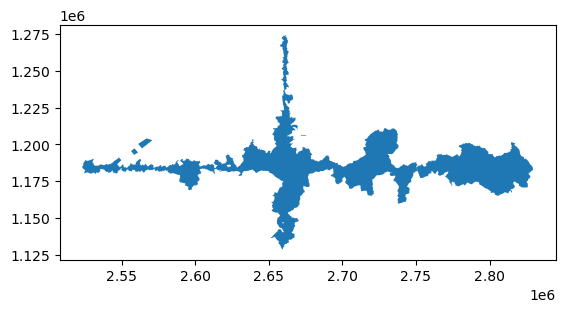

In [188]:
munisNS_switzerland.dissolve().overlay(munisWE_switzerland.dissolve(), how="union",keep_geom_type=True).dissolve().plot()

In [189]:
muniMidswitzerland=munisNS_switzerland.dissolve().overlay(munisWE_switzerland.dissolve(), how="union",keep_geom_type=True).dissolve()
muniMidswitzerland

,geometry,GDENAME_1_1,BEZNAME_1_1,GDENAME_2_1,GDENAME_1_2,BEZNAME_1_2,GDENAME_2_2
0,"MULTIPOLYGON (((2653488.483 1178999.780, 26534...",Rüschegg,Amtsbezirk Schwarzenburg,Wahlern,Lungern,Kanton Obwalden,Lungern


In [190]:
# some cleaning

muniMidswitzerland['zone']='middles'
muniMidswitzerland=muniMidswitzerland.loc[:,['GDENAME_1_1','zone','geometry']]
muniMidswitzerland

,GDENAME_1_1,zone,geometry
0,Rüschegg,middles,"MULTIPOLYGON (((2653488.483 1178999.780, 26534..."


<Axes: >

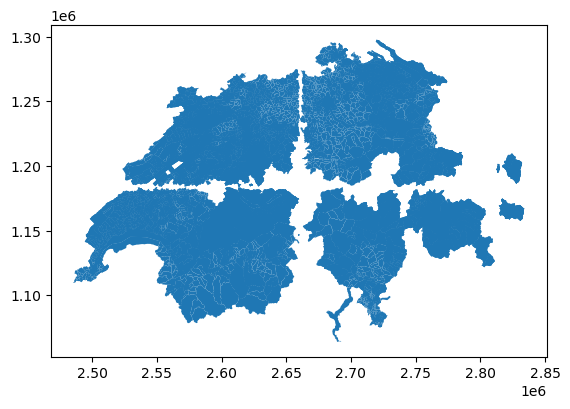

In [191]:
#DIFFERENCE

# with the municipalities
switzerland_municipalities.overlay(muniMidswitzerland, how='difference').plot()

<Axes: >

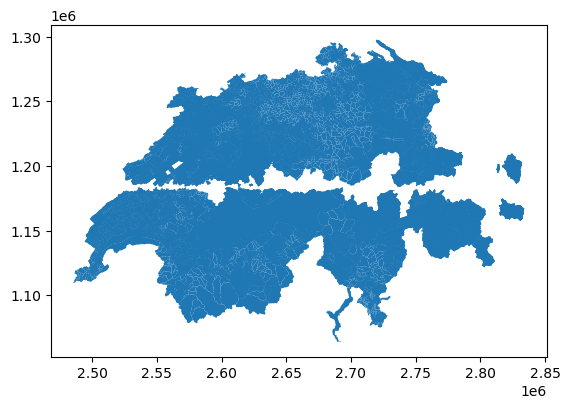

In [192]:
#SYMETRIC DIFFERENCE

MunisN_switzerland.overlay(MunisS_switzerland, how="symmetric_difference",keep_geom_type=False).plot()

<Axes: >

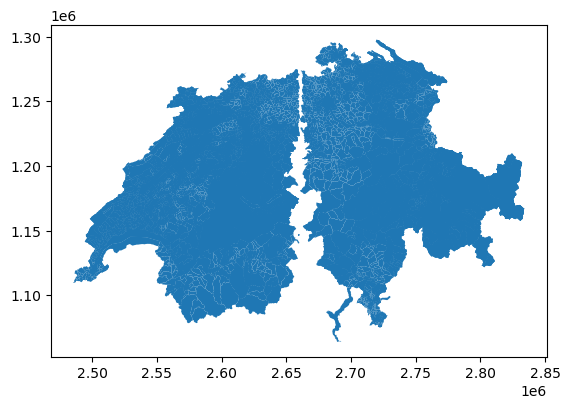

In [193]:
MunisW_switzerland.overlay(MunisE_switzerland, how="symmetric_difference",keep_geom_type=False).plot()

In [194]:
# hulls for the mid size airports:
Switzerland_AirTopLeft_hull=Switzerland_AirTopLeft.dissolve().convex_hull
Switzerland_AirTopRight_hull=Switzerland_AirTopRight.dissolve().convex_hull
Switzerland_AirBottomLeft_hull=Switzerland_AirBottomLeft.dissolve().convex_hull
Switzerland_AirBottomRight_hull=Switzerland_AirBottomRight.dissolve().convex_hull

<Axes: >

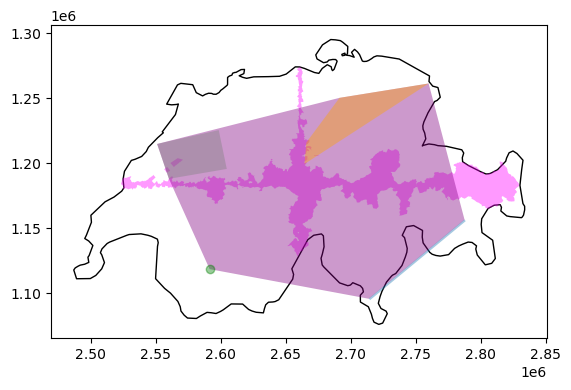

In [196]:
base = switzerland_2056.plot(color='white', edgecolor='black') #unprojected
muniMidswitzerland.plot(ax=base,facecolor='magenta',alpha=0.4) #unprojected
MediumAirport_hull.plot(ax=base,facecolor='purple',alpha=0.4)
Switzerland_AirTopLeft_hull.plot(ax=base,facecolor='grey', alpha=0.4)
Switzerland_AirTopRight_hull.plot(ax=base,facecolor='orange', alpha=0.4)
Switzerland_AirBottomLeft_hull.plot(ax=base,facecolor='green', alpha=0.4)
Switzerland_AirBottomRight_hull.plot(ax=base,facecolor='red', alpha=0.4)